# Sentiment Analysis (MapReduce-Style) — Starter Notebook
This notebook is a **minimal template**. You will fill in the TODOs to:
1) Define keyword sets
2) Implement the `map_post` function (Map)
3) Group by label (Shuffle/Group)
4) Sum totals (Reduce)
5) Print counts **and** a final verdict (Happier / Sadder / Tied)

Use the provided dataset path or change it to your file.
Keep the logic **very simple** (exact keyword matches, case-insensitive).

## 0) Dataset Path (edit if needed)

In [8]:
DATA_PATH = 'data/sample_us_posts.txt'  # TODO: change path if needed
print('Using dataset:', DATA_PATH)

Using dataset: data/sample_us_posts.txt


## 1) Keywords
Fill in positive and negative keyword sets.

In [9]:
POS = {"happy", "excited", "thrilled", "love"}  # TODO: e.g., {'happy', 'excited'}
NEG = {"sad", "depressed", "angry", "upset"}  # TODO: e.g., {'sad', 'depressed'}
print('POS:', POS, '\nNEG:', NEG)

POS: {'excited', 'thrilled', 'happy', 'love'} 
NEG: {'sad', 'upset', 'angry', 'depressed'}


## 2) Map
Implement a function that reads one line and returns a list with one pair: (label, 1)
Rules:
- Positive if contains ≥1 positive keyword and no negative
- Negative if contains ≥1 negative and no positive
- Mixed if contains both
- Neutral otherwise

Hints:
- Use `line.lower()` and `split()` to get words for simplicity.

In [10]:
import re

def map_post(line: str):
    """
    Map function: tokenize and classify sentiment for a single post.
    Returns a list with one tuple: (label, 1)
    """
    # Tokenize using regex (letters and apostrophes only, case-insensitive)
    words = re.findall(r"[a-zA-Z']+", line.lower())
    word_set = set(words)
    
    # Check for keyword matches
    has_positive = bool(word_set & POS)
    has_negative = bool(word_set & NEG)
    
    # Apply classification rules
    if has_positive and has_negative:
        return [('Mixed', 1)]
    elif has_positive:
        return [('Positive', 1)]
    elif has_negative:
        return [('Negative', 1)]
    else:
        return [('Neutral', 1)]

# Test the function
test_cases = [
    "I am so happy today!",
    "I feel sad and depressed.",
    "I love this but I'm also upset.",
    "The weather is nice."
]

print("Testing map_post function:")
for test in test_cases:
    result = map_post(test)
    print(f'"{test}" -> {result[0]}')

Testing map_post function:
"I am so happy today!" -> ('Positive', 1)
"I feel sad and depressed." -> ('Negative', 1)
"I love this but I'm also upset." -> ('Mixed', 1)
"The weather is nice." -> ('Neutral', 1)


## 3) Driver: Map Over Lines (provided)
We iterate through the file and collect `(label, 1)` pairs.

In [11]:
mapped = []
with open(DATA_PATH, 'r', encoding='utf-8') as f:
    for line in f:
        if line.strip():
            pairs = map_post(line)
            mapped.extend(pairs)
print('First few mapped items:', mapped[:10])

First few mapped items: [('Positive', 1), ('Positive', 1), ('Negative', 1), ('Negative', 1), ('Positive', 1), ('Positive', 1), ('Neutral', 1), ('Mixed', 1), ('Positive', 1), ('Mixed', 1)]


## 4) Shuffle/Group
Group values by label into a dictionary, e.g., {'Positive':[1,1,...], 'Negative':[1,...]}.

In [12]:
groups = {}
# Group mapped results by label (key)
for (label, value) in mapped:
    if label not in groups:
        groups[label] = []
    groups[label].append(value)

print("Grouped results:")
for label, values in groups.items():
    print(f"  {label}: {len(values)} items (values: {values[:5]}{'...' if len(values) > 5 else ''})")

Grouped results:
  Positive: 5 items (values: [1, 1, 1, 1, 1])
  Negative: 2 items (values: [1, 1])
  Neutral: 1 items (values: [1])
  Mixed: 2 items (values: [1, 1])


## 5) Reduce
Create totals by summing values for each label, e.g., {'Positive': 3, 'Negative': 2, ...}

In [13]:
totals = {}
# Reduce: sum all values for each label
for label, values in groups.items():
    totals[label] = sum(values)

print("Reduced totals:")
for label, total in totals.items():
    print(f"  {label}: {total}")

Reduced totals:
  Positive: 5
  Negative: 2
  Neutral: 1
  Mixed: 2


## 6) Print Counts and Verdict
- Print totals for all labels
- Compute and print a **verdict**: Happier / Sadder / Tied
  based on Positive vs Negative counts.

In [14]:
# Print totals in required format
positive = totals.get('Positive', 0)
negative = totals.get('Negative', 0) 
mixed = totals.get('Mixed', 0)
neutral = totals.get('Neutral', 0)

print(f"Positive={positive} Negative={negative} Mixed={mixed} Neutral={neutral}")

# Compute and print verdict
if positive > negative:
    verdict = "Happier"
elif negative > positive:
    verdict = "Sadder"
else:
    verdict = "Tied"

print(f"Verdict: {verdict}")

print(f"\nDetailed breakdown:")
print(f"  Total posts processed: {sum(totals.values())}")
print(f"  Positive keywords used: {POS}")
print(f"  Negative keywords used: {NEG}")

Positive=5 Negative=2 Mixed=2 Neutral=1
Verdict: Happier

Detailed breakdown:
  Total posts processed: 10
  Positive keywords used: {'excited', 'thrilled', 'happy', 'love'}
  Negative keywords used: {'sad', 'upset', 'angry', 'depressed'}


## 7) Optional: Bar Chart (nice to have)
If you know matplotlib, you can draw a simple bar chart.

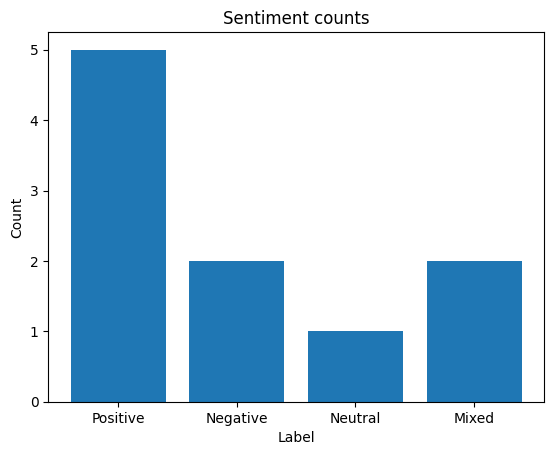

In [15]:
# Optional
try:
    import matplotlib.pyplot as plt
    labels = list(totals.keys())
    values = [totals[k] for k in labels]
    plt.figure()
    plt.bar(labels, values)
    plt.title('Sentiment counts')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()
except Exception as e:
    print('Chart skipped or totals not ready yet:', e)